## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from collections import Counter
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_data = pd.merge(mouse_metadata, study_results, how='outer', on="Mouse ID")
# Display the data table for preview
pd.set_option("display.max_rows", None, "display.max_columns", None)
display(merged_data)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [2]:
# Checking the number of mice.
total_mice = len(pd.unique(merged_data['Mouse ID']))
display(total_mice)


249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = merged_data.loc[merged_data.duplicated(subset = ['Mouse ID', 'Timepoint']),'Mouse ID'].unique()



In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
dupe_mouse_df = pd.DataFrame(duplicate_mice)
dupe_mouse_df


,0
0,g989


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_df = merged_data[merged_data['Mouse ID'].isin(duplicate_mice)==False]
display(cleaned_df)






,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [6]:
# Checking the number of mice in the clean DataFrame.
cleaned_mouse_count = len(pd.unique(cleaned_df['Mouse ID']))
print(cleaned_mouse_count)

248


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
volume_mean = cleaned_df.groupby('Drug Regimen').mean()['Tumor Volume (mm3)']
volume_median = cleaned_df.groupby('Drug Regimen').median()['Tumor Volume (mm3)']
volume_variance = cleaned_df.groupby('Drug Regimen').var()['Tumor Volume (mm3)']
volume_std = cleaned_df.groupby('Drug Regimen').std()['Tumor Volume (mm3)']
volume_sem = cleaned_df.groupby('Drug Regimen').sem()['Tumor Volume (mm3)']
# Assemble the resulting series into a single summary dataframe.
summary_df = pd.DataFrame({'Mean Tumor Volume (mm3)': volume_mean,
                          'Median Tumor Volume (mm3)': volume_median,
                          'Variance in Tumor Volume (mm3)': volume_variance,
                          'Standard Dev. of Tumor Volume (mm3)': volume_std,
                          'SEM of Tumor Volume (mm3)': volume_sem})
display(summary_df)

,Mean Tumor Volume (mm3),Median Tumor Volume (mm3),Variance in Tumor Volume (mm3),Standard Dev. of Tumor Volume (mm3),SEM of Tumor Volume (mm3)
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line
agg_summary = cleaned_df.groupby('Drug Regimen').agg({'Tumor Volume (mm3)':['mean', 'median', 'var', 'std', 'sem']})
agg_summary.head(10)



Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Infubinol    178
Ceftamin     178
Propriva     148
Name: Drug Regimen, dtype: int64


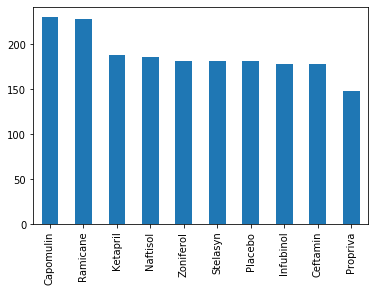

In [9]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
barchart1 = cleaned_df['Drug Regimen'].value_counts().plot(kind='bar')
display(barchart1)
print(cleaned_df['Drug Regimen'].value_counts())

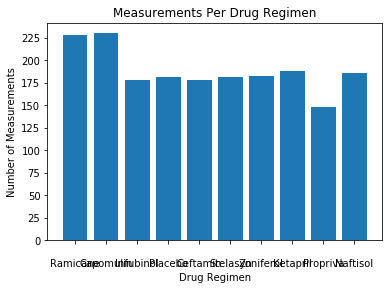

In [10]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
regimenlist = cleaned_df['Drug Regimen'].tolist
#using a counter to create paired regimens and counts
countedlist = Counter(regimenlist())
regimenkeys = countedlist.keys()
regimencounts = countedlist.values()
plt.bar(regimenkeys,regimencounts)
plt.title('Measurements Per Drug Regimen')
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Measurements")
#this is a dense chart, needs to be set larger.
plt.yticks(np.arange(0, max(regimencounts)+1, 25))
plt.tick_params(axis='x', which='major', labelsize=10, pad=15)
plt.show()

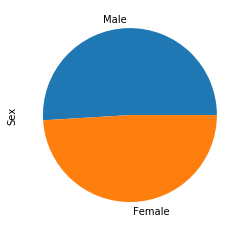

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
piechart = cleaned_df['Sex'].value_counts().plot(kind='pie')

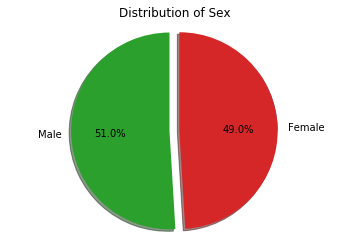

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
male = cleaned_df.Sex.value_counts().Male
female = cleaned_df.Sex.value_counts().Female
fig1, ax1 = plt.subplots()
sex_data = [male, female]
mylabels='Male', 'Female'
explode = (0.1, 0)
ax1.pie(explode)
plt.pie(sex_data, labels=mylabels,autopct='%1.1f%%', explode=explode, shadow=True, startangle=90)
ax1.axis('equal')
plt.title('Distribution of Sex')
plt.show()


## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
max_timepoint = cleaned_df.groupby('Mouse ID').max()['Timepoint']
timepoints_df = pd.DataFrame(max_timepoint)
timepoint_merge = pd.merge(timepoints_df, cleaned_df, on=('Mouse ID','Timepoint'), how='left')
#use list of the desired medications to create df of final tumor volumes
regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
filtered_timepoints = timepoint_merge.loc[timepoint_merge['Drug Regimen'].isin(regimens)]
filtered_timepoints = filtered_timepoints.rename(columns={"Timepoint": "Final Timepoint","Tumor Volume (mm3)":"Final Tumor Volume (mm3)"})
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
display(filtered_timepoints)

,Mouse ID,Final Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Final Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
3,a275,45,Ceftamin,Female,20,28,62.999356,3
6,a411,45,Ramicane,Male,3,22,38.407618,1
7,a444,45,Ramicane,Female,10,25,43.047543,0
10,a520,45,Ramicane,Male,13,21,38.810366,1
11,a577,30,Infubinol,Female,6,25,57.031862,2
12,a644,45,Ramicane,Female,7,17,32.978522,1
13,a685,45,Infubinol,Male,8,30,66.083066,3
19,b128,45,Capomulin,Female,9,22,38.982878,2


## Generate a box plot of the final tumor volume of each mouse across four regimens of interest


<Figure size 1080x1080 with 0 Axes>

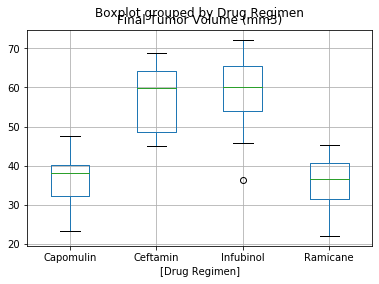

In [14]:
fig = plt.figure(figsize =(15, 15))
volume_plot = filtered_timepoints.boxplot(column = ['Final Tumor Volume (mm3)'],
                                         by=['Drug Regimen'], fontsize=10)
display(volume_plot)

## Line and Scatter Plots

In [15]:
# Put treatments into a list for for loop (and later for plot labels)

# Create empty list to fill with tumor vol data (for plotting)

tumor_vol0 = []
tumor_vol1 = []
tumor_vol2 = []
tumor_vol3 = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Locate the rows which contain mice on each drug and get the tumor volume
tumor_vol0 = filtered_timepoints.loc[filtered_timepoints['Drug Regimen']==regimens[0],'Final Tumor Volume (mm3)']
tumor_vol1 = filtered_timepoints.loc[filtered_timepoints['Drug Regimen']==regimens[1],'Final Tumor Volume (mm3)']
tumor_vol2 = filtered_timepoints.loc[filtered_timepoints['Drug Regimen']==regimens[2],'Final Tumor Volume (mm3)']
tumor_vol3 = filtered_timepoints.loc[filtered_timepoints['Drug Regimen']==regimens[3],'Final Tumor Volume (mm3)']

cap_vol = tumor_vol0.tolist()
ram_vol = tumor_vol1.tolist()
inf_vol = tumor_vol2.tolist()
cef_vol = tumor_vol3.tolist()

boxplot_df = pd.DataFrame({"Capomulin:":cap_vol,
                         "Ramicane:":ram_vol,
                          "Infubinol:":inf_vol,
                          "Ceftamin:": cef_vol})
#calculating quantiles of final tumor volumes
Q01 = np.quantile(cap_vol, 0.25)
Q03 = np.quantile(cap_vol, 0.75)
IQR0 = Q03 - Q01
outlier01 = Q01-(IQR0*1.5)
outlier02 = Q03+(IQR0*1.5)
#formatting for neat print statements
outlier01_formatted = "{:.3f}".format(outlier01)
outlier02_formatted = "{:.3f}".format(outlier02)
#process for Ramicane
Q11 = np.quantile(ram_vol, 0.25)
Q13 = np.quantile(ram_vol, 0.75)
IQR1 = Q13 - Q11
outlier11 = Q11-(IQR1*1.5)
outlier12 = Q13+(IQR1*1.5)
outlier11_formatted = "{:.3f}".format(outlier11)
outlier12_formatted = "{:.3f}".format(outlier12)
#process for infubinol
Q21 = np.quantile(inf_vol, 0.25)
Q23 = np.quantile(inf_vol, 0.75)
IQR2 = Q23 - Q21
outlier21 = Q21-(IQR2*1.5)
outlier22 = Q23+(IQR2*1.5)
outlier21_formatted = "{:.3f}".format(outlier21)
outlier22_formatted = "{:.3f}".format(outlier22)
#process for ceftamin
Q31 = np.quantile(cef_vol, 0.25)
Q33 = np.quantile(cef_vol, 0.75)
IQR3 = Q33 - Q31
outlier31 = Q31-(IQR3*1.5)
outlier32 = Q33+(IQR3*1.5)
outlier31_formatted = "{:.3f}".format(outlier31)
outlier32_formatted = "{:.3f}".format(outlier32)
    # Determine outliers using upper and lower bounds
cap_outliers = []
ram_outliers = []
inf_outliers = []
cef_outliers = []
#append outliers to list based on being above/below +/- 1.5 x IQR
for x in cap_vol:
    if x < int(outlier01) or x > int(outlier02):
        cap_outliers.append(x)
for y in (ram_vol):
    if y < int(outlier11) or y > int(outlier12):
        ram_outliers.append(y)
for i in inf_vol:
    if i < int(outlier21) or i > int(outlier22):
        inf_outliers.append(i)
for z in (cef_vol):
    if z < int(outlier31) or z > int(outlier32):
        cef_outliers.append(z)
#print outlier bounds and outlier count
print("For Capomulin, outliers in final tumor volume are below " + str(outlier01_formatted) +" (mm3) and above " + str(outlier02_formatted)+" (mm3). There are "+ str(len(cap_outliers)) + " in the set.")
print("For Ramicane, outliers in final tumor volume are below " + str(outlier11_formatted) +" (mm3) and above " + str(outlier12_formatted)+" (mm3). There are "+ str(len(ram_outliers)) + " in the set.")
print("For Infubinol, outliers in final tumor volume are below " + str(outlier21_formatted) +" (mm3) and above " + str(outlier22_formatted)+" (mm3). There are "+ str(len(inf_outliers)) + " in the set.")
print("For Ceftamin, outliers in final tumor volume are below " + str(outlier31_formatted) +" (mm3) and above " + str(outlier32_formatted)+" (mm3). There are "+ str(len(cef_outliers)) + " in the set.")

For Capomulin, outliers in final tumor volume are below 20.705 (mm3) and above 51.832 (mm3). There are 0 in the set.
For Ramicane, outliers in final tumor volume are below 17.913 (mm3) and above 54.307 (mm3). There are 0 in the set.
For Infubinol, outliers in final tumor volume are below 36.833 (mm3) and above 82.741 (mm3). There are 0 in the set.
For Ceftamin, outliers in final tumor volume are below 25.355 (mm3) and above 87.666 (mm3). There are 0 in the set.


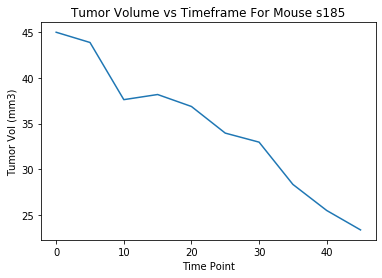

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
#generate a df containing only capomulin info
capo = ['Capomulin']
capo_df = cleaned_df.loc[cleaned_df['Drug Regimen'].isin(capo)]
#use an id from a mouse that went all the way to the highest timepoint(45)
capo_id = ['s185']
single_capo_df = capo_df.loc[cleaned_df['Mouse ID'].isin(capo_id)]
#display(single_capo_df)
#use matplotlib
fig=plt.figure()
ax=plt.axes()
plt.title("Tumor Volume vs Timeframe For Mouse s185")
plt.xlabel("Time Point")
plt.ylabel("Tumor Vol (mm3)")
plt.plot(single_capo_df['Timepoint'], single_capo_df['Tumor Volume (mm3)'])


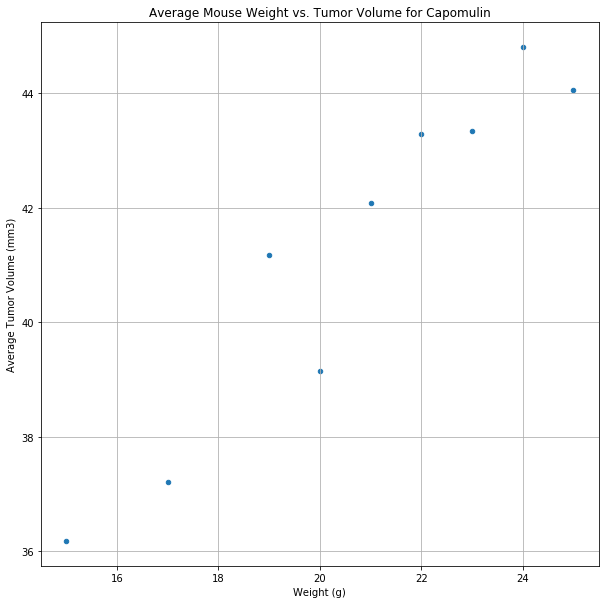

In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
avg_vol = capo_df.groupby('Weight (g)').mean()['Tumor Volume (mm3)']
avg_vol_df = pd.merge(avg_vol, capo_df, on=('Weight (g)','Tumor Volume (mm3)'), how='left')
avg_vol_df = avg_vol_df[['Weight (g)','Tumor Volume (mm3)']]
avg_tumor_vol = avg_vol_df.plot(kind="scatter", x='Weight (g)', y='Tumor Volume (mm3)', grid=True,
                            figsize=(10,10), title="Average Mouse Weight vs. Tumor Volume for Capomulin")
plt.ylabel('Average Tumor Volume (mm3)')
plt.xlabel='Mouse Weight (g)'
display(avg_tumor_vol)





## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen


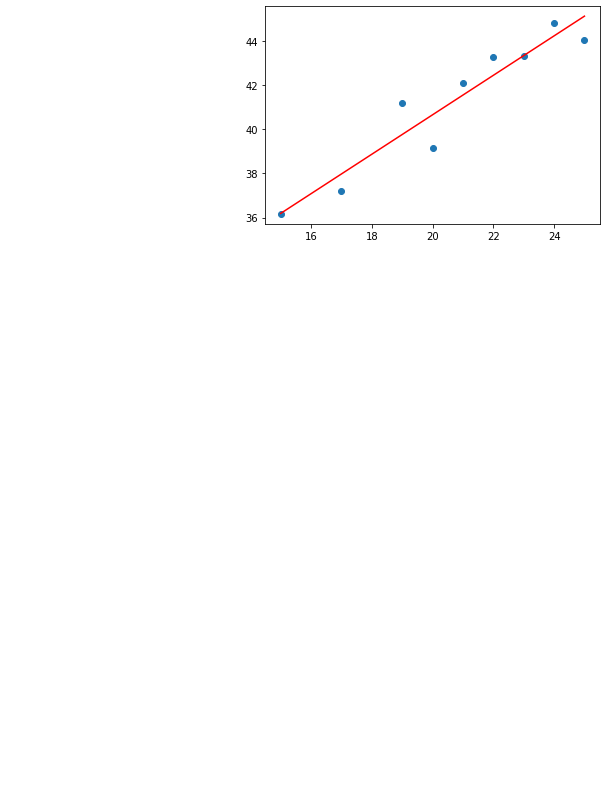

The correlation coefficient is 0.9505243961855271.


In [25]:
x_values = avg_vol_df['Weight (g)']
y_values = avg_vol_df['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.ylabel=('Average Tumor Volume')
plt.xlabel=('Mouse Weight (g)')
correlation = y_values.corr(x_values)
plt.show()
print("The correlation coefficient is " + str(correlation) +".")

